# Regressão Linear

Nesse desafio o objetivo é prever o preço de venda das casas (SalePrice), criando e avaliando a performance de dois modelos de Regressão Linear (simples e multipla).

## Conjunto de dados

In [2]:
#importando a biblioteca pandas
import pandas as pd

In [3]:
#importando o dataset 
df = pd.read_csv('train.csv')

#dimensão do dataset
print("O dataset possui {} linhas (registros) e {} colunas (features)".format(df.shape[0], df.shape[1]))

O dataset possui 1460 linhas (registros) e 81 colunas (features)


In [4]:
#uma amostra do dataset
df.head(10) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
#estatística descritiva
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Analisando o conjunto de dados

In [6]:
#importando bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:>

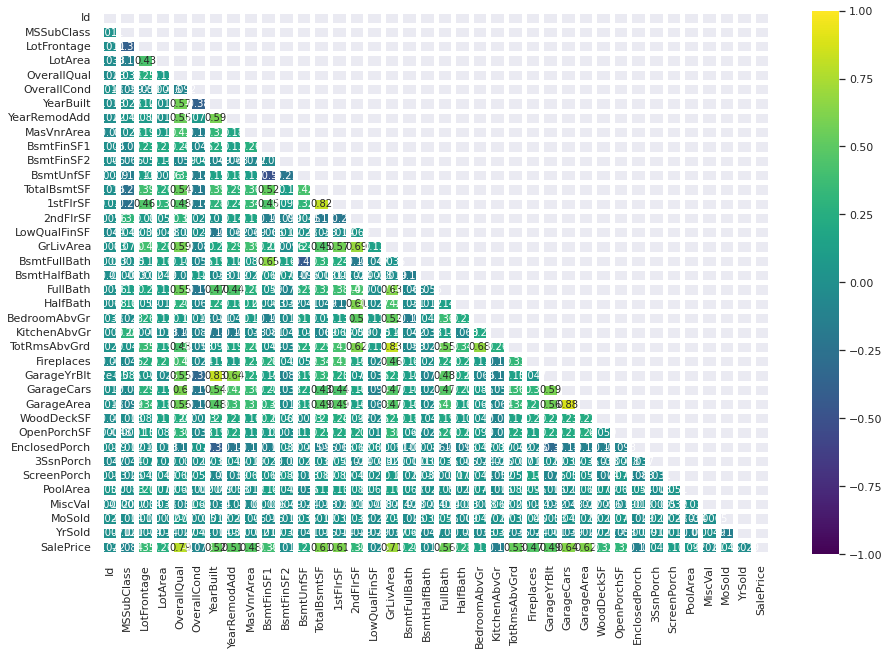

In [7]:
#calculando a matriz de correlação
corr=df.corr(method='pearson')  

#gráfico de correlação 
np.triu ( np.ones ( corr.shape , dtype  =  bool ))
mask  =  np.triu ( np.ones ( corr.shape , dtype  =  bool ))
fig = plt.gcf() 
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2.5)
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, mask  =  mask , annot_kws={"size": 10} ,cmap="viridis",linewidths=5, vmin=-1, vmax=1)

# Tipos de regressão

In [ ]:
#chamando pacotes 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Regressão Linear simples

In [8]:
#definindo varíaveis

#vetor de resposta
Y = df['SalePrice']

#vetor característica
X = df['OverallQual']

In [9]:
#dividindo o banco de dados em treino e teste
treino_Y, teste_Y, treino_X, teste_X = train_test_split(Y, X, test_size = 0.30, random_state=42)

In [10]:
#verificando dados de treino e teste
print('Dados de treino de Y:', treino_Y.shape)
print('Dados de teste  de Y:', teste_Y.shape)
print('Dados de treino de X:', treino_X.shape)
print('Dados de teste  de X:', teste_X.shape)

Dados de treino de Y: (1022,)
Dados de teste  de Y: (438,)
Dados de treino de X: (1022,)
Dados de teste  de X: (438,)


In [22]:
#transformando dataframes em array
treino_X = np.array(treino_X)
treino_Y = np.array(treino_Y)
teste_X = np.array(teste_X)
teste_Y = np.array(teste_Y)

#criando o modelo
regr_simples = LinearRegression()

#ajustando o modelo
regr_simples.fit(treino_X.reshape(-1, 1), treino_Y.reshape(-1, 1))

#criando as predicoes
preds_regr_simples = regr_simples.predict(teste_X.reshape(-1, 1))

#coeficientes
print("Intercept: \n", regr_simples.intercept_)
print('Coefficients: \n', regr_simples.coef_)

#métricas
print('MSE: %.2f'% mean_squared_error(teste_Y, preds_regr_simples))
print('RMSE: %.2f'% mean_squared_error(teste_Y, preds_regr_simples, squared=False))
print('Score R2: %.2f'% r2_score(teste_Y, preds_regr_simples))

Intercept: 
 [-90859.86808346]
Coefficients: 
 [[44413.27753174]]
MSE: 2483429086.65
RMSE: 49834.02
Score R2: 0.64


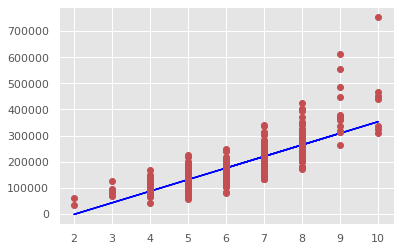

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#plotando predições do modelo regr_simples 
plt.plot(teste_X, preds_regr_simples, color="blue")

#amostras de teste (vermelho)
plt.plot(teste_X, teste_Y, 'ro')

plt.show()

### Regressão Linear Múltipla

In [17]:
#definindo varíaveis

#vetor de resposta
Y = df['SalePrice']

#matriz de características
X = df.loc[:,['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']]

#dividindo o banco de dados em treino e teste
y_train, y_test, X_train, X_test = train_test_split(Y, X, test_size = 0.30, random_state=20)

In [24]:
#transformando dataframes em array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

#criando o nosso modelo 
reg_ols = LinearRegression()

#treinando o model
reg_ols.fit(X_train, y_train)

#coeficientes
print("Coeficientes: {}".format(reg_ols.coef_))
print("Intercept: {}".format(reg_ols.intercept_))

#fazendo predicoes
preds_ols_sklearn = reg_ols.predict(X_test)

#avaliando o modelo (R^2)
print('MSE: %.2f'% mean_squared_error(y_test, preds_ols_sklearn))
print('RMSE: %.2f'% mean_squared_error(y_test, preds_ols_sklearn, squared=False))
print('Score R2: %.2f'% r2_score(y_test, preds_ols_sklearn))

Coeficientes: [2.35260665e+04 4.73985710e+01 1.69867995e+04 1.19206714e+01
 2.58599416e+01]
Intercept: -97336.06987252584
MSE: 1474765855.31
RMSE: 38402.68
Score R2: 0.77
